In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                   stratify=y, random_state=0)

# standardize the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# Here we obtain the eigenvectors and eigenvalues
cov_mat = np.cov(X_train_std.T)
# np.cov computes the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# linalg.eig performs eigendecomposition
print('Eigenvalues\n%s'%eigen_vals)

Eigenvalues
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [6]:
# here we get the total percentage of explained variance as we add compopnents
tot = sum(eigen_vals)
exp_var = [(i / tot)*100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(exp_var)
print('Variance captured by each component \n%s'%exp_var)
print('\n')
print('Cumulative percentage of variance as we add components\n%s'%cum_var_exp)

Variance captured by each component 
[36.951468599607644, 18.434927059884167, 11.815159094596986, 7.3342517637854705, 6.4221078217316725, 5.051724484907654, 3.954653891241449, 2.6439183169220035, 2.3893192591852928, 1.6296137737251015, 1.3800211221948417, 1.172226244308596, 0.8206085679091375]


Cumulative percentage of variance as we add components
[ 36.9514686   55.38639566  67.20155475  74.53580652  80.95791434
  86.00963882  89.96429272  92.60821103  94.99753029  96.62714407
  98.00716519  99.17939143 100.        ]


In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)




In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

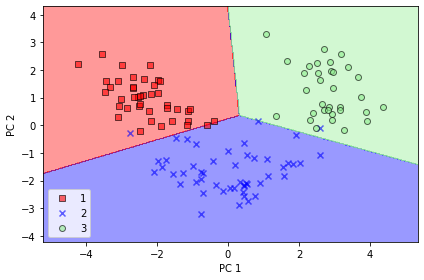

In [9]:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                       random_state=1,
                       solver='lbfgs')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [10]:
# get accuracy then run model again with more 


array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,